This notebook was used to finalize the tiw_time, sla, sst, and dsst functions that were used to finalize data analysis.
Contains all argo floats downloaded and plots to check the vailidity of the function

### **Download Data**

'df53', 'df54', 'df55', 'df51', 'df59', 'df63', 'df86', 'df89', 'df74', 'df75', 'df76', 'df39', 'df65', 'df66', 'df67', 'df189', 'df34', 'df23'

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy
from cartopy import util
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cft
import matplotlib.gridspec as gridspec
import numpy as np
import h5py
import pandas as pd
import dask.dataframe as dd
import dask.array as da
import statistics
from shapely.geometry import Polygon, Point
from scipy import interpolate
%matplotlib inline

In [8]:
path1='data/sla_2017-2023_360.nc'
dh=xr.open_mfdataset(path1)

In [9]:
path1='data/sst.day.mean.20*.nc'
ds=xr.open_mfdataset(path1).sel(lon=slice(160,360),lat=slice(-20,20))

In [10]:
df51 = xr.open_mfdataset('data/Equatorial_Pacific/ep-2903451_Sprof.nc')
df51 = df51.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [11]:
df74 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906474_Sprof.nc')
df74 = df74.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [12]:
df75 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906475_Sprof.nc')
df75 = df75.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [13]:
df76 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906476_Sprof.nc')
df76 = df76.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [14]:
df65 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906765_Sprof.nc')
df65 = df65.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [15]:
df67 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906767_Sprof.nc')
df67 = df67.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [16]:
df61 = xr.open_mfdataset('data/Equatorial_Pacific/ep-2903461_Sprof.nc')
df61 = df61.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [17]:
df62 = xr.open_mfdataset('data/Equatorial_Pacific/ep-2903462_Sprof.nc')
df62 = df62.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [18]:
df63 = xr.open_mfdataset('data/Equatorial_Pacific/ep-2903463_Sprof.nc')
df63 = df63.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [19]:
df73 = xr.open_mfdataset('data/Equatorial_Pacific/sel_float_073.nc')
df73 = df73.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [20]:
df48 = xr.open_mfdataset('data/Equatorial_Pacific/sel_float_048.nc')
df48 = df48.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [21]:
df39 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5905139_Sprof.nc')
df39 = df39.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [22]:
df43 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906043_Sprof.nc')
df43 = df43.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [23]:
df44 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906044_Sprof.nc')
df44 = df44.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [24]:
df45 = xr.open_mfdataset('data/Equatorial_Pacific/ep-5906045_Sprof.nc')
df45 = df45.rename({'CYCLE_NUMBER':'PROF_NUM','JULD':'time'}).swap_dims({'N_PROF':'time'})

In [25]:
#climatology mean
def clim_anomaly(VAR):
    VARp=VAR.groupby('time.month')-VAR.groupby('time.month').mean('time')
    return VARp

In [27]:
#import functions used for colocation from utils
from utils import get_times
from utils import get_sla_dome
from utils import gets_cold_core
from utils import argo_in_core
from utils import get_LEF_mask

### **Analysis Plots**

Text(0.5, 1.0, 'CHLA Concentration in ETZs between 2-5ºN')

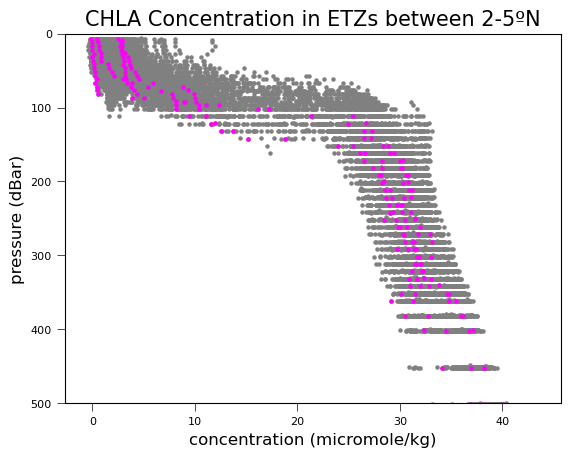

In [305]:
datasets = ['df45']#, 'df44', 'df43', 'df39']
#ecc_times = ['df43_core_times', 'df44_core_times', 'df45_core_times', 'df51_core_times']
etz_times = ['df45_transition_times']#, 'df44_transition_times', 'df39_transition_times']

for df_name, ecc_time_name, etz_time_name in zip(datasets, ecc_times, etz_times):
    df = globals()[df_name]  # Access DataFrame using its name as a string
    ecc_time = globals()[ecc_time_name]
    etz_time = globals()[etz_time_name]
    plt.scatter(df.NITRATE_ADJUSTED, df.PRES_ADJUSTED, color='gray', s=5, label='all floats', zorder=0) #all floats
    #plt.scatter(df.DOXY_ADJUSTED.sel(time=ecc_time, method='nearest'), df.PRES_ADJUSTED.sel(time=ecc_time, method='nearest'), c='gold', s=5, zorder=2) #ecc
    plt.scatter(df.NITRATE_ADJUSTED.sel(time=etz_time, method='nearest'), df.PRES_ADJUSTED.sel(time=etz_time, method='nearest'), c='fuchsia', s=5, zorder=1) #etz
plt.ylim(500, 0)
plt.xlabel('concentration (micromole/kg)', fontsize=12, color='black')
plt.ylabel('pressure (dBar)', fontsize=12, color='black', rotation=90)
plt.tick_params(axis='both', which='major', labelsize=8, labelcolor='black', width=0.5, length=6)
plt.title('CHLA Concentration in ETZs between 2-5ºN', fontsize=15)

Text(0.5, 1.0, 'Chl-a Concentration in TIW transitions for float 65')

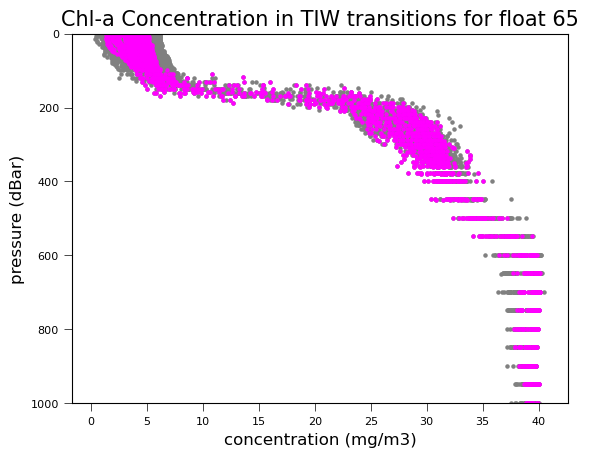

In [201]:
datasets = ['df65']
LEF_times = ['df65_transition_times']

for df_name, LEF_time_name in zip(datasets, LEF_times):
    df = globals()[df_name]  # Access DataFrame using its name as a string
    LEF_timestamp = globals()[LEF_time_name]
    plt.scatter(df.NITRATE_ADJUSTED, df.PRES_ADJUSTED, color='gray', s=5, label='all floats', zorder=0) #all floats
    plt.scatter(df.NITRATE_ADJUSTED.sel(time=LEF_timestamp, method='nearest'), df.PRES_ADJUSTED.sel(time=LEF_timestamp, method='nearest'), c='fuchsia', s=5, zorder=2) #ecc
    #plt.scatter(df.DOXY_ADJUSTED.sel(time=etz_time, method='nearest'), df.PRES_ADJUSTED.sel(time=etz_time, method='nearest'), c='darkorange', s=5, zorder=1) #etz
plt.ylim(1000, 0)
plt.xlabel('concentration (mg/m3)', fontsize=12, color='black')
plt.ylabel('pressure (dBar)', fontsize=12, color='black', rotation=90)
plt.tick_params(axis='both', which='major', labelsize=8, labelcolor='black', width=0.5, length=6)
plt.title('Chl-a Concentration in TIW transitions for float 65', fontsize=15)

### **QC Flags**

In [254]:
# Function to convert an array from NumPy datetime64 to Python float format
def datetime_to_float(dt):
  return (dt - np.datetime64('1900-01-01')) / np.timedelta64(1,'D')

# Function to convert an array from Python float to NumPy datetime64 format
def float_to_datetime(nums):
  return (nums * np.timedelta64(1,'D')) + np.datetime64('1900-01-01')

# Function to interpolate df62 from a specified float parameter to a uniform time and pressure grid
def interpolate_depth_section(param_name,specify_qc_flags=None,pres_interval=1.0):
  time_coord = df62.time.values
  pres_coord = np.arange(0,df62['PRES'].max(),pres_interval)
  time_grid, pres_grid = np.meshgrid(time_coord,pres_coord)
  time_grid = datetime_to_float(time_grid)     # Convert from np.datetime64 to float
    # 1-D (flattened) versions of old grids and parameter values
  time_1D = np.tile(df62.time.values,(len(df62['N_LEVELS']),1)).T.flatten()
  pres_1D = df62['PRES'].values.flatten()
  param_1D = df62[param_name].values.flatten()
  if param_1D.dtype == object:         # If parameter is an array of QC flag df62
    param_1D = param_1D.astype(float)  # Convert QC flags from dtype 'object' to float
    interp_method = 'nearest'          # Use nearest-neighbor interpolation for QC flags to avoid unwanted averaging
  else:
    interp_method = 'linear'           # Use bilinear interpolation for normal df62 fields
  # Extract only values matching specified QC flags
  if specify_qc_flags is not None:
    qc_1D = df62[param_name + '_QC'].values.astype(float).flatten()
    qc_mask = np.tile(False,len(qc_1D))
    for qc_flag in specify_qc_flags:
      qc_mask = np.logical_or(qc_mask,qc_1D == qc_flag)
    time_1D = time_1D[qc_mask]
    pres_1D = pres_1D[qc_mask]
    param_1D = param_1D[qc_mask]
  # Remove NaN values before interpolation
  time_1D = datetime_to_float(time_1D[~np.isnan(param_1D)])       # Convert from np.datetime64 to float
  pres_1D = pres_1D[~np.isnan(param_1D)]
  param_1D = param_1D[~np.isnan(param_1D)]
  # Interpolate from irregular points to grid
  param_gridded = interpolate.griddata((time_1D,pres_1D),param_1D,(time_grid,pres_grid),method=interp_method)
  # Return coordinates, grid, and gridded df62
  return time_coord, pres_coord, float_to_datetime(time_grid), pres_grid, param_gridded

Text(0.5, 1.0, "['DOXY_QC']")

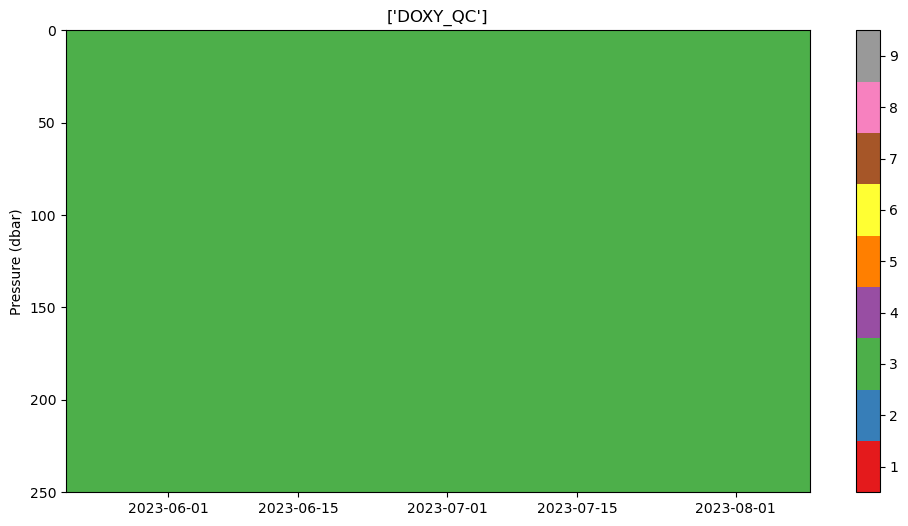

In [257]:
# Interpolate data
param_name = 'DOXY_QC'
time_coord, pres_coord, time_grid, pres_grid, param_gridded = interpolate_depth_section(param_name)

# Plot depth section of upper ocean only
plt.figure(figsize=(12,6))
plt.pcolormesh(time_grid,pres_grid,param_gridded,cmap='Set1',vmin=0.5,vmax=9.5)
plt.ylim([0,250])
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.colorbar()
#plt.title(df73[param_name].long_name);
plt.title([param_name])

### **Plotting to check**

100%|█████████████████████████████████████████████| 6/6 [00:33<00:00,  5.55s/it]


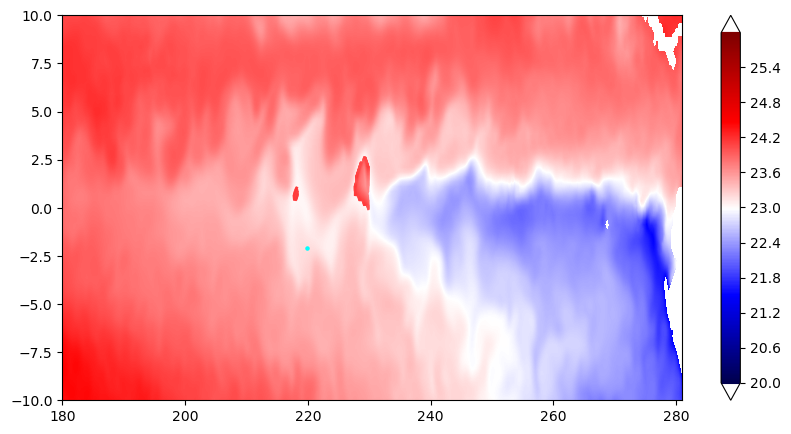

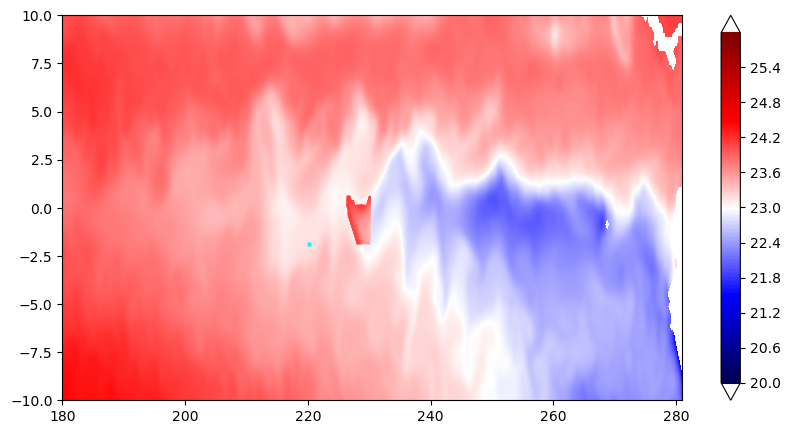

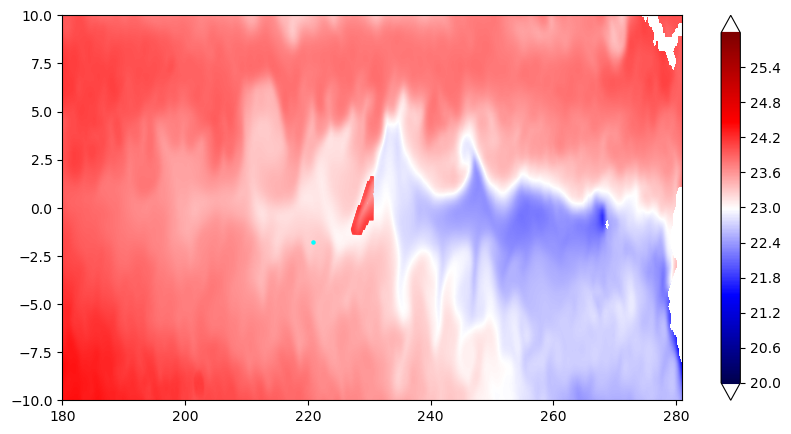

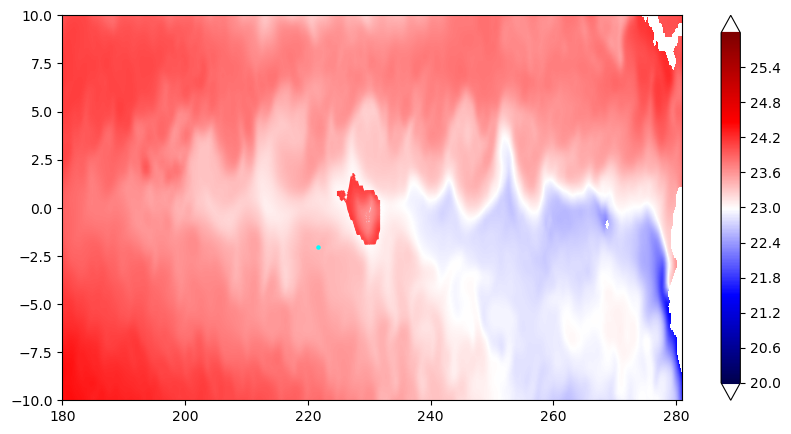

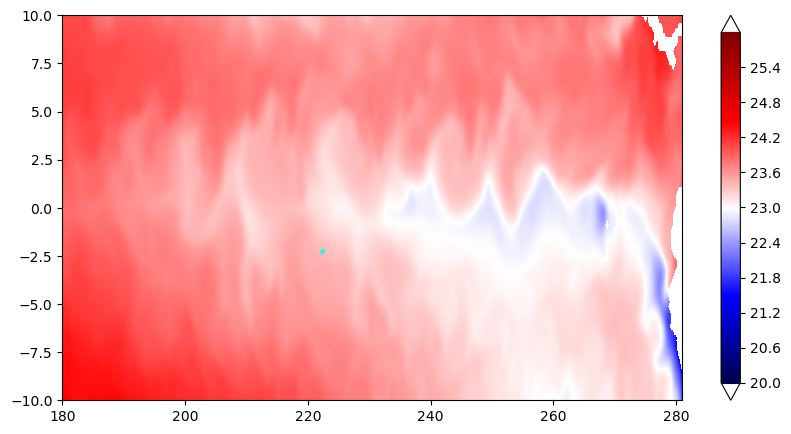

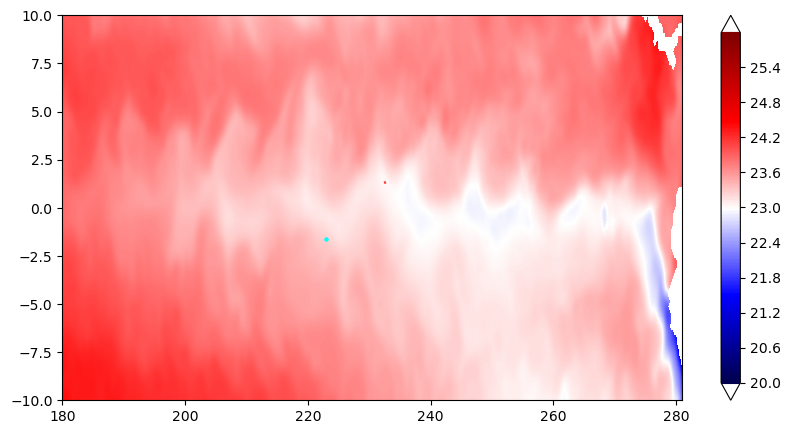

In [108]:
#plot to check if sla domes are valid
from tqdm import tqdm
for time in tqdm(df48_in_core.time):
    fig=plt.figure(figsize=(10,5))
    gs=fig.add_gridspec(nrows=6,ncols=1,wspace=0.29,hspace=0.25,)
    
    ax = fig.add_subplot()
    sst = ax.contourf(ds.sst.lon, ds.sst.lat, ds.sst.sel(time=time, method='nearest'), cmap='bwr', levels=np.arange(18, 30, 0.01))
    bummer_innit = ax.contour(df48_in_core['lon'], df48_in_core['lat'], df48_in_core.sel(time=time, method='nearest').squeeze(), levels=np.arange(20,26,0.01), cmap='seismic', extend='both') #sst
    argo = ax.scatter((df48.LONGITUDE % 360).sel(time=time, method='nearest'), df48.LATITUDE.sel(time=time, method='nearest'), s=5, color='cyan', zorder=2)
    plt.colorbar(bummer_innit)
    plt.ylim(-10,10)
    plt.xlim(180,281)

In [ ]:
#plot to check if cold cores are valid
from tqdm import tqdm
for time in tqdm(sla_dome_times76):
    fig=plt.figure(figsize=(10,5))
    gs=fig.add_gridspec(nrows=30,ncols=1,wspace=0.29,hspace=0.25,)
    
    ax1 = fig.add_subplot()
    slas = ax1.contourf(LEF76['lon'], LEF76['lat'], LEF76.sel(time=time, method='nearest').squeeze(), levels=np.arange(0,4,0.01), cmap='seismic', extend='both') #sst
    #sst = ax1.contourf(ds.sst.lon, ds.sst.lat, ds.sst.sel(time=time, method='nearest'), cmap='Blues', levels=np.arange(18, 30, 0.01))
    argo = ax1.scatter((df76.LONGITUDE % 360).sel(time=time, method='nearest'), df76.LATITUDE.sel(time=time, method='nearest'), s=5, color='cyan', zorder=2)
    plt.colorbar(slas)

### **Yay! Data concentration Analysis!**

In [ ]:
fig=plt.figure(figsize=(7,4),dpi=100,facecolor='white')

for time in argos_coldcore_times:
    plt.scatter(df61.DOXY_ADJUSTED.sel(time=time), df61.PRES_ADJUSTED.sel(time=time), c='cyan', zorder=5, s=5)#, label='floats through TIW')
    plt.scatter(df61.DOXY_ADJUSTED, df61.PRES_ADJUSTED, color='orange', s=5)
    plt.ylim(500, 0)
    plt.xlabel('concentration (micromole/kg)', fontsize=10, color='black', fontstyle='oblique')
    plt.ylabel('pressure (decibar)', fontsize=10, color='black', fontstyle='oblique', rotation=90)
    plt.tick_params(axis='both', which='major', labelsize=8, labelcolor='black', width=0.5, length=6)
    plt.title('Dissolved Oxygen in TIW Float 73')

In [ ]:
plt.figure(figsize=(5, 4))

#needs data with nan values removed

plt.hist(df61.DOXY_ADJUSTED.isel(N_LEVELS=2), bins=50, color='orange', histtype='bar', label='DO Levels', density=True)
plt.vlines([201.2635 , 189.10307, 188.05916, 195.26187, 194.25502], 0, 0.5, ls='--', label='cold core') #concentrations at cc times

plt.xlabel('Dissolved Oxygen Concentration (micromole/kg)', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('DO Distribution between 6-8 dBar', fontsize=14)
plt.legend()

In [ ]:
fig=plt.figure(figsize=(20,12),dpi=100,facecolor='white')
gs=fig.add_gridspec(nrows=4,ncols=2,wspace=0.29,hspace=0.0,)
I=0
i=0

SENS = ['TEMP_ADJUSTED', 'NITRATE_ADJUSTED', 'DOXY_ADJUSTED', 'CHLA_ADJUSTED']
time = 'JULD'

def rename_variables(var):
    if var == SENS:
        return 'long_name'
    else:
        return var

        #plt.title('SST Data Comparison')

for I, sensor in enumerate(SENS):
    ax1 = fig.add_subplot(gs[i, 0])
    fl= ax1.scatter(df[time],df[sensor].isel(N_LEVELS=2), c='grey', s=2, label='all floats')
    #tw=ax1.step(df[time].where(tempmin),df[sensor].where(tempmin), c='blue', s=2, label='TIW events')
    #sat = ax1.scatter(sst_sat.time,sst_sat,s=10,color='red',label='NOAA satellite')
    ax1.set_ylabel(rename_variables(sensor),fontsize=12,color='black',rotation=90)
    ax1.tick_params(axis='both', which='major', labelsize=8, labelcolor='black', width=0.5, length=6)
    i += 1

In [ ]:
df48['sshp']=dh.sla...

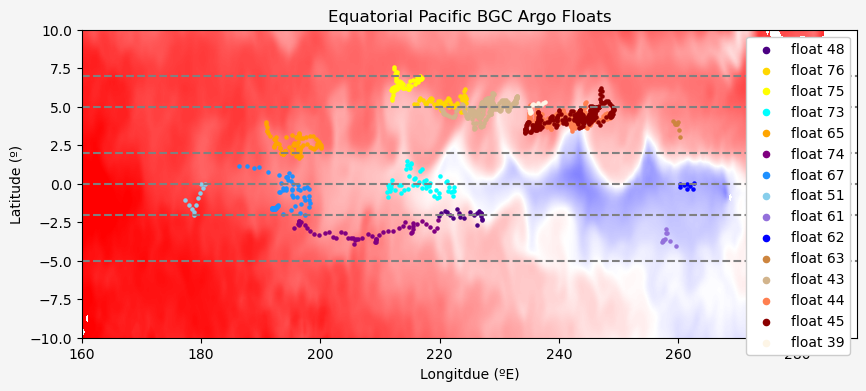

In [224]:
plt.figure(figsize=(10, 4),facecolor='whitesmoke')

plt.contourf(ds.sst.lon, ds.sst.lat, ds.sst.sel(time='2022-01-16'), levels=np.arange(18,30,0.01), extend='both', cmap='bwr')
plt.ylim(-10,10)
plt.xlim(160,290)
plt.scatter((df48.LONGITUDE % 360), df48.LATITUDE, color='indigo', s=5, zorder=2, label='float 48')
plt.scatter((df76.LONGITUDE % 360), df76.LATITUDE, color='gold', s=5, zorder=2, label='float 76')
plt.scatter((df75.LONGITUDE % 360), df75.LATITUDE, color='yellow', s=5, zorder=2, label='float 75')
plt.scatter((df61.LONGITUDE % 360), df61.LATITUDE, color='cyan', s=5, zorder=2, label='float 73')
plt.scatter((df65.LONGITUDE % 360), df65.LATITUDE, color='orange', s=5, zorder=2, label='float 65')
plt.scatter((df74.LONGITUDE % 360), df74.LATITUDE, color='purple', s=5, zorder=2, label='float 74')
plt.scatter((df67.LONGITUDE % 360), df67.LATITUDE, color='dodgerblue', s=5, zorder=2, label='float 67')
plt.scatter((df51.LONGITUDE % 360), df51.LATITUDE, color='skyblue', s=5, zorder=2, label='float 51')
plt.scatter((df61.LONGITUDE % 360), df61.LATITUDE, color='mediumpurple', s=5, zorder=2, label='float 61')
plt.scatter((df62.LONGITUDE % 360), df62.LATITUDE, color='blue', s=5, zorder=2, label='float 62')
plt.scatter((df63.LONGITUDE % 360), df63.LATITUDE, color='peru', s=5, zorder=2, label='float 63')
plt.scatter((df43.LONGITUDE % 360), df43.LATITUDE, color='tan', s=5, zorder=2, label='float 43')
plt.scatter((df44.LONGITUDE % 360), df44.LATITUDE, color='coral', s=5, zorder=2, label='float 44')
plt.scatter((df45.LONGITUDE % 360), df45.LATITUDE, color='darkred', s=5, zorder=2, label='float 45')
plt.scatter((df39.LONGITUDE % 360), df39.LATITUDE, color='oldlace', s=5, zorder=2, label='float 39')
plt.hlines(2,160,290,ls='--', colors='gray')
plt.hlines(5,160,290,ls='--', colors='gray')
plt.hlines(7,160,290,ls='--', colors='gray')
plt.hlines(0,160,290,ls='--', colors='gray')
plt.hlines(-2,160,290,ls='--', colors='gray')
plt.hlines(-5,160,290,ls='--', colors='gray')
plt.xlabel('Longitdue (ºE)')
plt.ylabel('Latitude (º)')
plt.title('Equatorial Pacific BGC Argo Floats')
plt.legend(markerscale=2.0, framealpha=1.0)

In [ ]:
plt.figure(figsize=(8, 4))

plt.contourf(ds.sst.lon, ds.sst.lat, ds.sst.sel(time='2022-01-16'), levels=np.arange(18,30,0.01), extend='both', cmap='bwr')
plt.ylim(-10,10)
plt.xlim(160,290)

for df in zip(df48, df76, df75, df61, df65, df74, df67, df51, df61, df62, df63):
    plt.scatter((df.LONGITUDE % 360), df.LATITUDE, color='gray', s=2, zorder=2)

In [ ]:
df61.PROF_NUM.sel(time=argos_coldcore_times).values

In [ ]:
df61.NITRATE_ADJUSTED.sel(time=argos_coldcore_times).isel(N_LEVELS=2).values

In [ ]:
fig=plt.figure(figsize=(4,10),dpi=100,facecolor='white')
gs=fig.add_gridspec(nrows=7,ncols=1,wspace=0.29,hspace=0.5,)

VALUES = [9.06573  , 9.663671 , 8.466144 , 8.6525345]

for I, vals in enumerate(VALUES):
    ax1=fig.add_subplot(gs[I,0])
    pn=ax1.hist(df61.NITRATE_ADJUSTED.isel(N_LEVELS=2), bins=50,color='orange')
    plt.vlines(vals,0,5,ls='--')
    plt.title('PDF of float NO3') 

In [ ]:
x = df61.NITRATE_ADJUSTED.isel(N_LEVELS=2) > 8.3
selected_values = df61.time.where(x).dropna(dim='time')

selected_values_values = selected_values.values
print(selected_values_values)


In [ ]:
df61.NITRATE_ADJUSTED.sel(time='2022-12-01').isel(N_LEVELS=2).values

In [ ]:
plt.contourf(ds.sst['lon'], ds.sst['lat'], ds.sst.sel(time='2022-12-01', method='nearest').squeeze(), levels=np.arange(18,30,0.01), cmap='seismic', extend='both')
plt.scatter((df61.LONGITUDE % 360).sel(time='2022-12-01', method='nearest'), df61.LATITUDE.sel(time='2022-12-01', method='nearest'), color='cyan', s=2, zorder=2)
plt.ylim(-20,20)
plt.xlim(160,290)

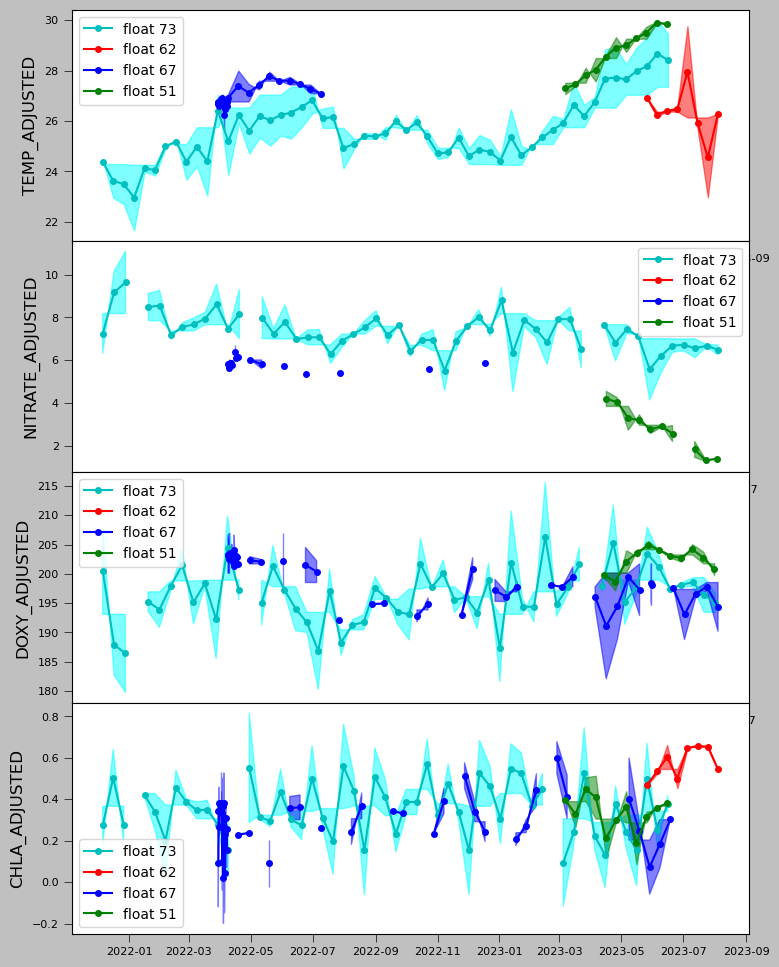

In [216]:
fig=plt.figure(figsize=(20,12),dpi=100,facecolor='silver',)
gs=fig.add_gridspec(nrows=4,ncols=2,wspace=0.29,hspace=0.0,)
I=0
i=0

SENS = ['TEMP_ADJUSTED', 'NITRATE_ADJUSTED', 'DOXY_ADJUSTED', 'CHLA_ADJUSTED']
time = time

def rename_variables(var):
    if var == SENS:
        return 'long_name'
    else:
        return var

        #plt.title('SST Data Comparison')

for I, sensor in enumerate(SENS):
    ax1 = fig.add_subplot(gs[i, 0])
    fl= ax1.plot(df61.time,df61[sensor].isel(N_LEVELS=5), '-oc', label='float 73', ms=4)
    clim = ax1.fill_between(df61.time, 
                            df61[sensor].isel(N_LEVELS=5)+clim_anomaly(df61[sensor].isel(N_LEVELS=5)), 
                            df61[sensor].isel(N_LEVELS=5)-clim_anomaly(df61[sensor].isel(N_LEVELS=5)), 
                            alpha=0.5, color='cyan')
    fl= ax1.plot(df62.time,df62[sensor].isel(N_LEVELS=5), '-or', label='float 62', ms=4)
    clim = ax1.fill_between(df62.time, 
                            df62[sensor].isel(N_LEVELS=5)+clim_anomaly(df62[sensor].isel(N_LEVELS=5)), 
                            df62[sensor].isel(N_LEVELS=5)-clim_anomaly(df62[sensor].isel(N_LEVELS=5)), 
                            alpha=0.5, color='red')
    fl= ax1.plot(df67.time,df67[sensor].isel(N_LEVELS=5), '-ob', label='float 67', ms=4)
    clim = ax1.fill_between(df67.time, 
                            df67[sensor].isel(N_LEVELS=5)+clim_anomaly(df67[sensor].isel(N_LEVELS=5)), 
                            df67[sensor].isel(N_LEVELS=5)-clim_anomaly(df67[sensor].isel(N_LEVELS=5)), 
                            alpha=0.5, color='blue')
    fl= ax1.plot(df51.time,df51[sensor].isel(N_LEVELS=5), '-og', label='float 51', ms=4)
    clim = ax1.fill_between(df51.time, 
                            df51[sensor].isel(N_LEVELS=5)+clim_anomaly(df51[sensor].isel(N_LEVELS=5)), 
                            df51[sensor].isel(N_LEVELS=5)-clim_anomaly(df51[sensor].isel(N_LEVELS=5)), 
                            alpha=0.5, color='green')
    ax1.set_ylabel(rename_variables(sensor),fontsize=12,color='black',rotation=90)
    ax1.tick_params(axis='both', which='major', labelsize=8, labelcolor='black', width=0.5, length=6)
    ax1.legend()
    i += 1

#Axes.fill_between(df61.time, df61[sensor].isel(N_LEVELS=5)+clim_anomaly(df61[sensor].isel(N_LEVELS=5), df61[sensor].isel(N_LEVELS=5)-clim_anomaly(df61[sensor].isel(N_LEVELS=5) cmap='Reds')


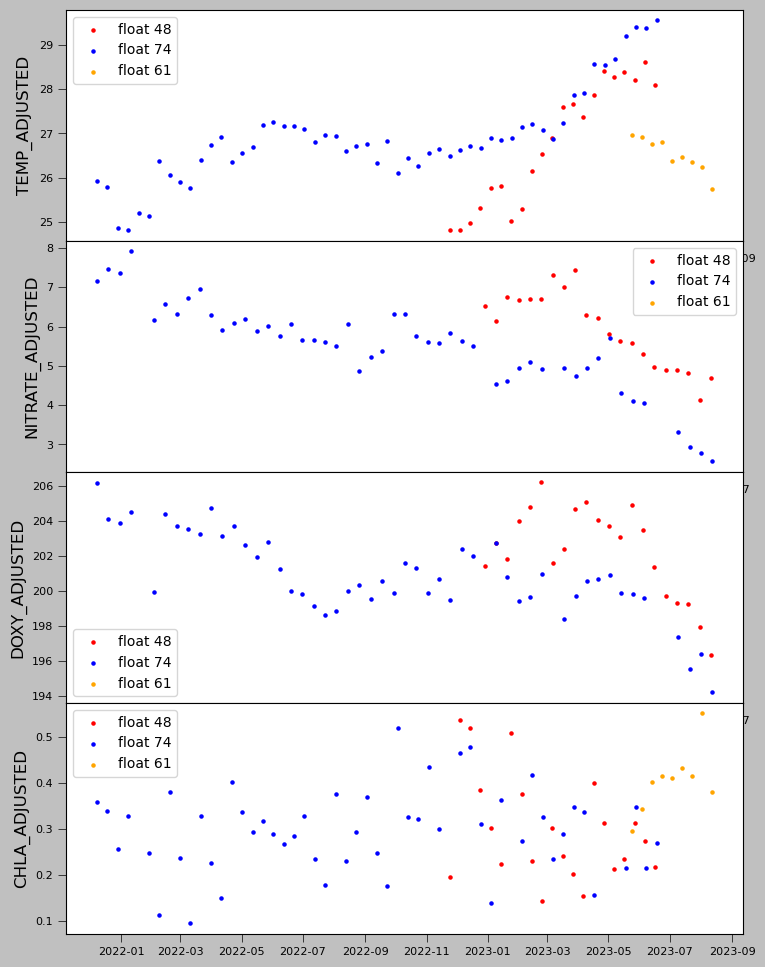

In [58]:
fig=plt.figure(figsize=(20,12),dpi=100,facecolor='silver')
gs=fig.add_gridspec(nrows=4,ncols=2,wspace=0.29,hspace=0.0,)
I=0
i=0

SENS = ['TEMP_ADJUSTED', 'NITRATE_ADJUSTED', 'DOXY_ADJUSTED', 'CHLA_ADJUSTED']
time = time

def rename_variables(var):
    if var == SENS:
        return 'long_name'
    else:
        return var

        #plt.title('SST Data Comparison')

for I, sensor in enumerate(SENS):
    ax1 = fig.add_subplot(gs[i, 0])
    fl= ax1.scatter(df48.time,df48[sensor].isel(N_LEVELS=2), c='red', s=5, label='float 48')
    fl= ax1.scatter(df74.time,df74[sensor].isel(N_LEVELS=2), c='blue', s=5, label='float 74')
    fl= ax1.scatter(df61.time,df61[sensor].isel(N_LEVELS=2), c='orange', s=5, label='float 61')
    #tw=ax1.step(df[time].where(tempmin),df[sensor].where(tempmin), c='blue', s=2, label='TIW events')
    #sat = ax1.scatter(sst_sat.time,sst_sat,s=10,color='red',label='NOAA satellite')
    ax1.set_ylabel(rename_variables(sensor),fontsize=12,color='black',rotation=90)
    ax1.tick_params(axis='both', which='major', labelsize=8, labelcolor='black', width=0.5, length=6)
    ax1.legend()
    i += 1

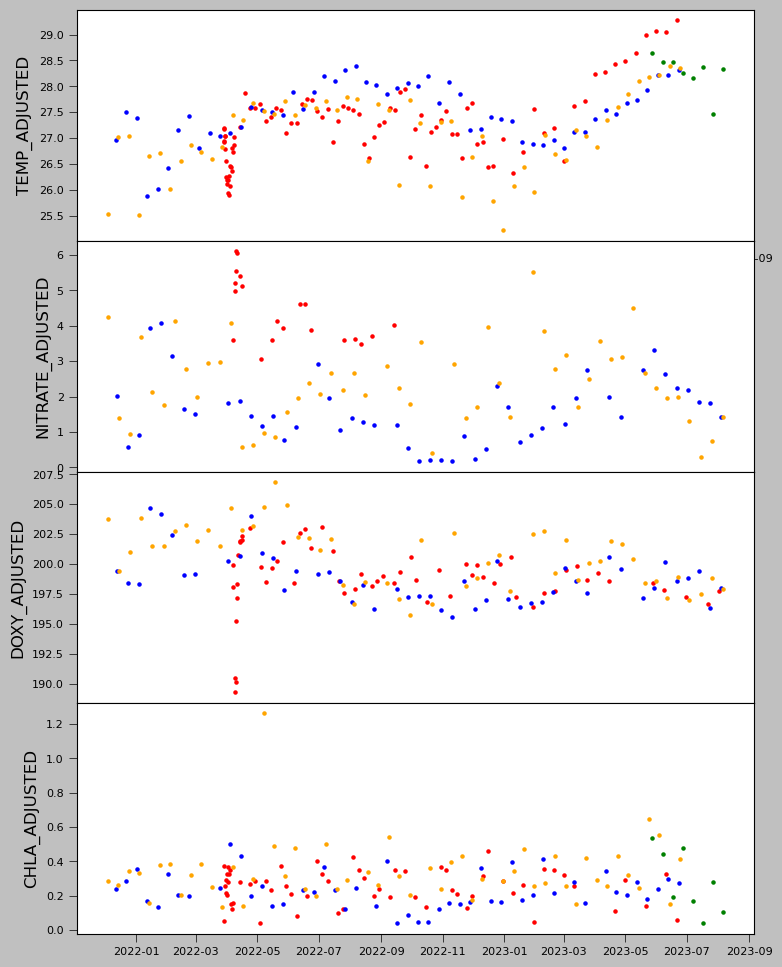

In [79]:
fig=plt.figure(figsize=(20,12),dpi=100,facecolor='silver')
gs=fig.add_gridspec(nrows=4,ncols=2,wspace=0.29,hspace=0.0,)
I=0
i=0

SENS = ['TEMP_ADJUSTED', 'NITRATE_ADJUSTED', 'DOXY_ADJUSTED', 'CHLA_ADJUSTED']
time = time

def rename_variables(var):
    if var == SENS:
        return 'long_name'
    else:
        return var

        #plt.title('SST Data Comparison')

for I, sensor in enumerate(SENS):
    ax1 = fig.add_subplot(gs[i, 0])
    fl= ax1.scatter(df65.time,df65[sensor].isel(N_LEVELS=5), c='red', s=5, label='float 65')
    fl= ax1.scatter(df75.time,df75[sensor].isel(N_LEVELS=5), c='blue', s=5, label='float 75')
    fl= ax1.scatter(df76.time,df76[sensor].isel(N_LEVELS=5), c='orange', s=5, label='float 76')
    fl= ax1.scatter(df63.time,df63[sensor].isel(N_LEVELS=5), c='green', s=5, label='float 63')
    #tw=ax1.step(df[time].where(tempmin),df[sensor].where(tempmin), c='blue', s=2, label='TIW events')
    #sat = ax1.scatter(sst_sat.time,sst_sat,s=10,color='red',label='NOAA satellite')
    ax1.set_ylabel(rename_variables(sensor),fontsize=12,color='black',rotation=90)
    ax1.tick_params(axis='both', which='major', labelsize=8, labelcolor='black', width=0.5, length=6)
    i += 1

In [78]:
df65.DOXY_ADJUSTED.isel(N_LEVELS=5).values

array([      nan,       nan, 198.11949,       nan, 199.94608,       nan,
             nan, 189.32225, 190.515  , 190.15901, 195.29556, 197.22566,
       198.318  ,       nan, 200.77852,       nan, 201.93108, 201.81543,
             nan, 202.35292, 202.05547,       nan,       nan, 203.04343,
             nan, 199.76096, 198.50204, 199.6831 , 200.23305, 201.833  ,
             nan, 198.45798, 202.60786, 202.95511, 201.37016,       nan,
       203.13693,       nan, 201.07376, 198.57718, 197.6434 ,       nan,
       197.91849, 199.14676,       nan, 198.21452, 198.64333, 199.03835,
             nan, 198.41382, 199.36977,       nan, 200.56386, 198.70262,
             nan, 196.85262,       nan, 199.52971,       nan, 197.34138,
             nan,       nan, 199.98265, 199.1423 , 199.94939, 198.95447,
             nan, 198.45674, 200.06012,       nan, 200.6034 , 197.28586,
             nan, 196.47595, 197.56273, 197.76953, 199.53604, 199.8418 ,
       198.7135 , 199.23328, 198.59428,       nan, 

In [64]:
df65.PRES_ADJUSTED.isel(N_LEVELS=5).values

array([1.76     , 2.       , 1.8      , 1.04     , 1.6      , 2.       ,
       1.96     , 1.8      , 1.8      , 1.84     , 1.84     , 1.88     ,
       1.76     , 1.96     , 1.8      , 2.       , 1.8000001, 1.8000001,
       1.96     , 1.8399999, 1.72     , 1.96     , 2.       , 1.76     ,
       2.       , 1.76     , 1.8000001, 1.72     , 1.92     , 1.88     ,
       1.96     , 1.92     , 1.8000001, 1.8      , 1.88     , 1.96     ,
       1.88     , 1.92     , 1.84     , 1.64     , 1.7199999, 2.       ,
       1.76     , 1.8      , 1.04     , 1.9599999, 1.6      , 1.84     ,
       1.08     , 1.76     , 1.76     , 1.96     , 1.68     , 1.72     ,
       2.04     , 1.8000001, 1.96     , 1.68     , 2.       , 1.88     ,
       1.96     , 2.       , 1.6800001, 1.56     , 1.68     , 1.88     ,
       2.04     , 1.76     , 1.7199999, 1.92     , 1.64     , 1.6800001,
       2.       , 1.6800001, 1.72     , 1.76     , 1.8      , 1.64     ,
       1.8      , 1.8      , 1.56     , 1.92     , 

In [84]:
clim65 = clim_anomaly(df65.NITRATE_ADJUSTED.isel(N_LEVELS=5)).values

array([        nan,         nan, -1.2422254 ,         nan,         nan,
               nan,         nan,  0.160079  ,  0.37411642,  0.70802927,
        0.9539962 ,  0.89564323,         nan,         nan,         nan,
               nan,  0.2635765 ,         nan,         nan, -0.02545595,
               nan,         nan,         nan,         nan,         nan,
       -2.087761  ,         nan, -0.4791479 ,  0.06003761, -0.1245997 ,
               nan,         nan,  0.54370975,  0.36365223, -0.3636527 ,
               nan,         nan,         nan,         nan,         nan,
        0.01768208,         nan,  0.06533527, -0.08301711,         nan,
       -0.16529202,         nan,         nan,         nan,  0.16529202,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      